In [1]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from fastai.vision.all import *

In [3]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [5]:
%cd /content/drive/MyDrive/Vispol_classify

/content/drive/MyDrive/Vispol_classify


In [6]:
model = load_learner('models/vispol-1-recognizer-v0.pkl')

In [15]:
#!export
pollutant_labels = (
    "antennas",
    "billboard",
    "broken roads",
    "construction sites",
    "electric pole",
    "garbage can",
    "graffiti",
    "smog",
    "street litter"
)

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(pollutant_labels, map(float, probs)))

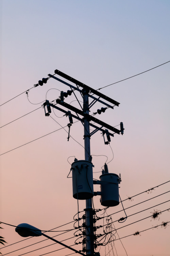

In [18]:
img = PILImage.create(f'test_images/poles.jpg')
img.thumbnail((256,256))
img

In [19]:
recognize_image(img)

{'antennas': 0.00038570791366510093,
 'billboard': 3.700462184497155e-05,
 'broken roads': 4.4147591893306526e-07,
 'construction sites': 0.00022819564037490636,
 'electric pole': 0.9993365406990051,
 'garbage can': 9.962874401026056e-07,
 'graffiti': 7.621663939971768e-07,
 'smog': 8.581743713875767e-06,
 'street litter': 1.71208023402869e-06}

In [21]:
#!export
image = gr.inputs.Image(shape=(256,256))
label = gr.outputs.Label()
examples = [
    'test_images/unknown_00.jpg',
    'test_images/unknown_01.jpg',
    'test_images/unknown_02.jpg',
    'test_images/unknown_03.jpg',
    'test_images/unknown_04.jpg'
    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False, share=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://354f0c36-f95a-4d9b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
